In [9]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/3_obj",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(224,224), 
    batch_size=32, 
)

Found 187 files belonging to 3 classes.
Using 150 files for training.
Using 37 files for validation.


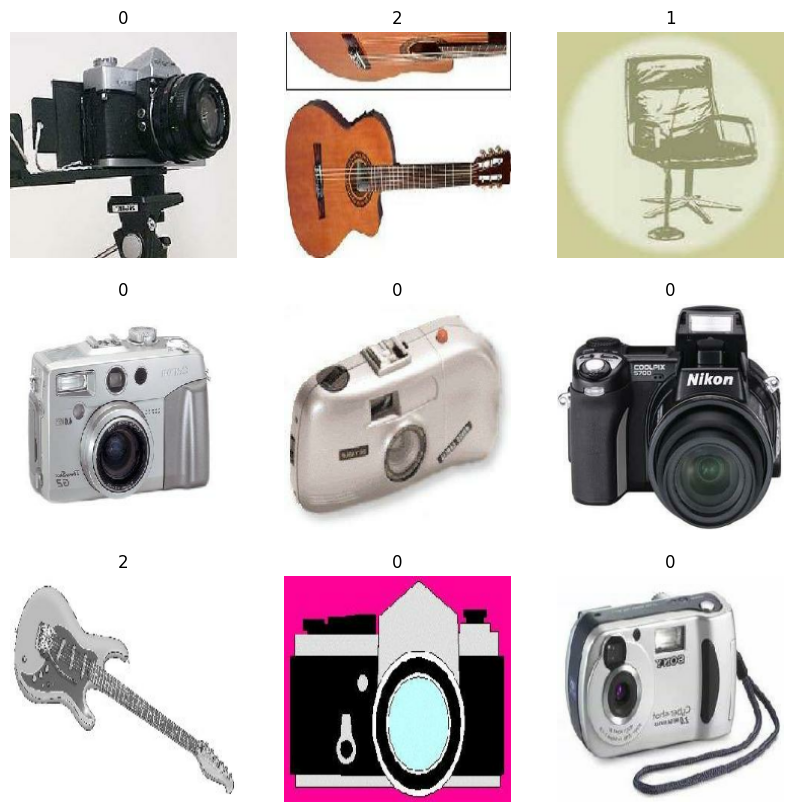

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [12]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)

In [13]:
inp = vgg.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model_new = tf.keras.Model(inp, out)

In [14]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True
model_new.layers[-2].trainable = True

In [15]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history_1 = model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
5/5 [==============================] - 74s 15s/step - loss: 1.8488 - accuracy: 0.7933 - val_loss: 1.3046 - val_accuracy: 0.9730
Epoch 2/5
5/5 [==============================] - 67s 13s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.3067 - val_accuracy: 0.9459
Epoch 3/5
5/5 [==============================] - 61s 12s/step - loss: 0.9719 - accuracy: 0.9867 - val_loss: 2.0597 - val_accuracy: 0.9730
Epoch 4/5
5/5 [==============================] - 58s 12s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.6061 - val_accuracy: 0.9730
Epoch 5/5
5/5 [==============================] - 56s 12s/step - loss: 7.1281e-06 - accuracy: 1.0000 - val_loss: 2.9250 - val_accuracy: 0.9730


In [17]:
img = tf.keras.preprocessing.image.load_img(
    "../data/3_obj/chair/image_0001.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 1s 674ms/step


array([[0., 1., 0.]], dtype=float32)

In [18]:
inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)

96112376/96112376 [==============================] - 9s 0us/step


In [19]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/3_obj",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(299,299), 
    batch_size=32, 
)

Found 187 files belonging to 3 classes.
Using 150 files for training.
Using 37 files for validation.


In [20]:
inp = inception.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(inception.layers[-2].output)
model_new2 = tf.keras.Model(inp, out)

In [21]:
for layer in model_new2.layers:
    layer.trainable = False
model_new2.layers[-1].trainable = True
model_new2.layers[-2].trainable = True

In [22]:
model_new2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history_2 = model_new2.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001B8032CEE60>
Traceback (most recent call last):
  File "C:\Users\vpash\AppData\Local\Programs\Python\Python310\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 


5/5 [==============================] - 34s 5s/step - loss: 18.2104 - accuracy: 0.2600 - val_loss: 8.9008 - val_accuracy: 0.5405
Epoch 2/5
5/5 [==============================] - 24s 5s/step - loss: 8.7850 - accuracy: 0.3467 - val_loss: 12.5344 - val_accuracy: 0.3784
Epoch 3/5
5/5 [==============================] - 23s 5s/step - loss: 7.3630 - accuracy: 0.3467 - val_loss: 4.2261 - val_accuracy: 0.4595
Epoch 4/5
5/5 [==============================] - 22s 5s/step - loss: 5.1716 - accuracy: 0.4600 - val_loss: 4.2598 - val_accuracy: 0.5676
Epoch 5/5
5/5 [==============================] - 23s 5s/step - loss: 4.0797 - accuracy: 0.5467 - val_loss: 5.2272 - val_accuracy: 0.4595


In [25]:
img = tf.keras.preprocessing.image.load_img(
    "../data/3_obj/chair/image_0001.jpg", target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new2.predict(img_array)
predictions

1/1 [==============================] - 2s 2s/step


array([[1.2292208e-12, 1.0000000e+00, 9.7760714e-15]], dtype=float32)

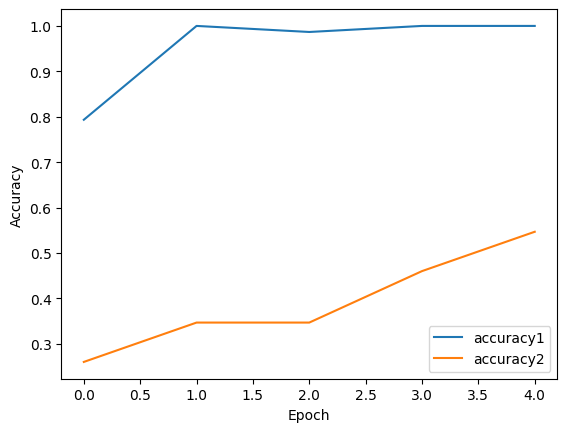

In [27]:
plt.plot(history_1.history['accuracy'], label='accuracy1')
plt.plot(history_2.history['accuracy'], label='accuracy2')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')